<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/0905_ds_hex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

EMPTY = 2
BLACK = 0
WHITE = 4

class Hex:
  def __init__(self, n):
    self.n = n
    self.board = np.zeros((n, n), dtype=int) + EMPTY
    self.blackds = [-1]*(n**2 + 2)
    for i in range(n):
      self.__union(self.blackds, i, n**2)
      self.__union(self.blackds, (n - 1) * n + i, n**2 + 1)
    self.whiteds = [-1]*(n**2 + 2)
    for i in range(n):
      self.__union(self.whiteds, i * n, n**2)
      self.__union(self.whiteds, i * n + n - 1, n**2 + 1)

  def __find(self, ds, e):
    if ds[e] < 0:
      return e
    else:
      ancestor = self.__find(ds, ds[e])
      ds[e] = ancestor
      return ancestor
      
  def __union(self, ds, a, b):
    a = self.__find(ds,  a)
    b = self.__find(ds, b)

    if a == b: return

    if ds[a] < ds[b]:
      ds[a] += ds[b]
      ds[b] = a
    else:
      ds[b] += ds[a]
      ds[a] = b

  def move(self, i, j, piece):
    if self.board[i, j] != EMPTY: return -1
    self.board[i, j] = piece
    ds = self.whiteds if piece == WHITE else self.blackds
    I = i * self.n + j
    adj = [(i-1, j), (i-1, j+1), (i, j-1), (i, j+1), (i+1, j-1), (i+1, j)]
    for ii, jj in adj:
      if ii < 0 or ii >= self.n or jj < 0 or jj >= self.n: continue
      if self.board[ii, jj] == piece:
        II = ii * self.n + jj
        self.__union(ds, I, II)
    N = self.n
    N = N*N
    return piece if self.__find(ds, N) == self.__find(ds, N + 1) else EMPTY

  def show(self):
    n = self.n
    shift = n*4 - 4
    tempboard = np.zeros((n*8, n*8 + shift)) + 2
    for i in range(n):
      for j in range(n):
        tempboard[i*8:(i+1)*8, j*8+i*4:(j+1)*8+i*4] = 1
        tempboard[i*8+1:(i+1)*8-1, j*8+i*4+1:(j+1)*8+i*4-1] = 2
    for i in range(n):
      for j in range(n):
        if self.board[i][j] != EMPTY:
          tempboard[i*8+2:(i+1)*8-2, j*8+i*4+2:(j+1)*8+i*4-2] = self.board[i][j]
    plt.imshow(tempboard, cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
import graphviz as gv
def drawDS(ds):
  graph = gv.Digraph("DisjointSet")
  graph.graph_attr['rankdir'] = "BT"
  graph.graph_attr['layout'] = "neato"
  for e, p in enumerate(ds):
    graph.node(str(e))
    if p >= 0:
      graph.edge(str(e), str(p))
  return graph

In [ ]:
hex = Hex(5)
print(hex.board)

[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]


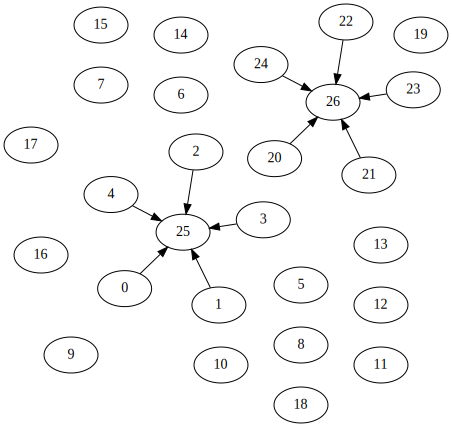

In [ ]:
drawDS(hex.blackds)

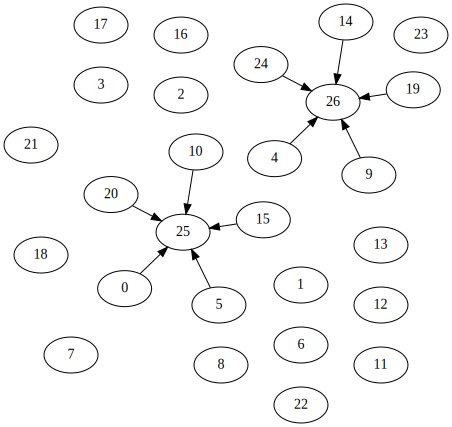

In [ ]:
drawDS(hex.whiteds)

In [ ]:
hex.move(0, 2, WHITE)

2

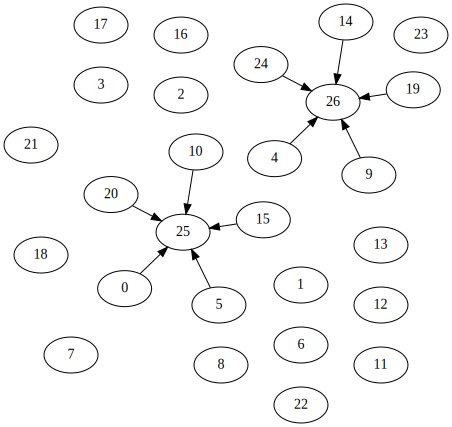

In [ ]:
drawDS(hex.whiteds)

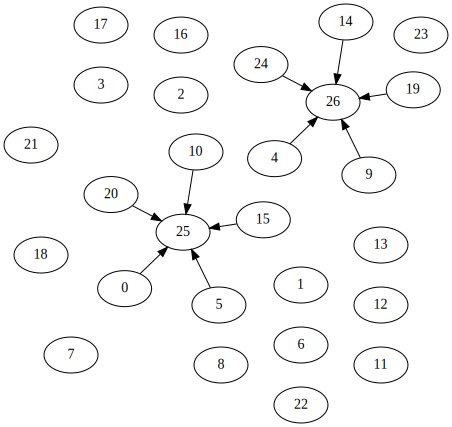

In [ ]:
hex.move(1, 0, WHITE)
drawDS(hex.whiteds)

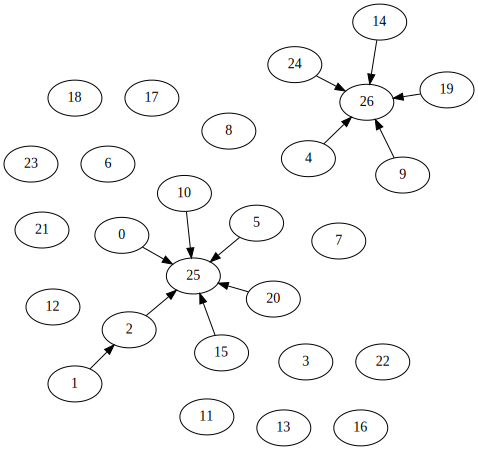

In [ ]:
hex.move(0, 1, WHITE)
drawDS(hex.whiteds)

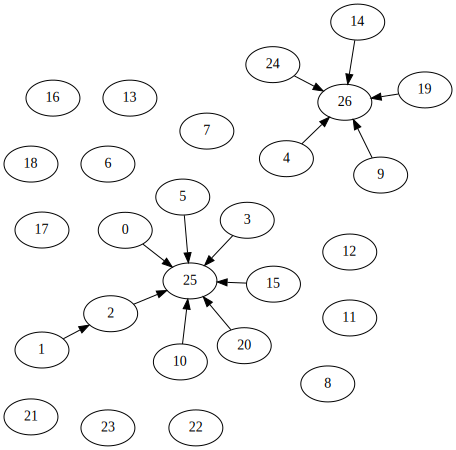

In [ ]:
hex.move(0, 3, WHITE)
drawDS(hex.whiteds)

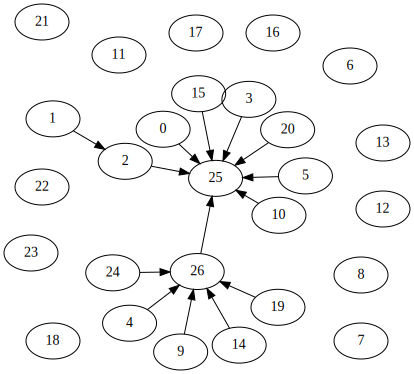

In [ ]:
hex.move(0, 4, WHITE)
drawDS(hex.whiteds)

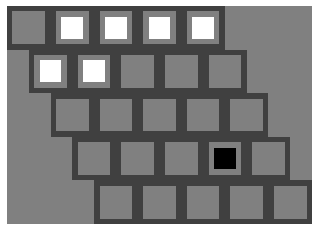

In [ ]:
hex.move(1, 1, WHITE)
hex.move(3, 3, BLACK)
hex.show()

winner BLACK


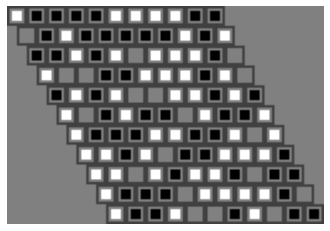

In [201]:
import random
n = 11
hex = Hex(n)

moves = [[i, j] for i in range(n) for j in range(n)]
random.shuffle(moves)

piece = WHITE
for i, j in moves:
  if hex.move(i, j, piece) != EMPTY:
    print(f"winner {'WHITE' if piece == WHITE else 'BLACK'}")
    break
  else:
    piece = WHITE if piece == BLACK else BLACK
hex.show()